In [ ]:
#dependancy
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
price_file=os.path.join("price.csv")
price_df=pd.read_csv(price_file)
#get all data
price_df.head()

In [3]:
#drop columns with nan
price_df.drop(price_df.columns[6:20], axis=1, inplace=True)
del price_df["January 2017"]
price_df

In [4]:
# sort populations ranks and assign urban, suburban and rural;
#urban up to 100
#suburban upto 2000
#rural <2000
#make loop in order to add in these conditions
city_type=[]
for i in range(len(price_df["Population Rank"]-1)):
    if price_df["Population Rank"][i] <= 100:
        city_type.append("Urban")
    elif price_df["Population Rank"][i] > 100 and price_df["Population Rank"][i] <= 2000:
        city_type.append("Suburban")
    else:
        city_type.append("Rural")
price_df["City Type"]=city_type
price_df.head(10)

,City Code,City,Metro,County,State,Population Rank,January 2012,February 2012,March 2012,April 2012,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,City Type
0,6181,New York,New York,Queens,NY,1,1752.0,1764.0,1778.0,1792,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,Urban
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2172.0,2175.0,2177.0,2183,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,Urban
2,17426,Chicago,Chicago,Cook,IL,3,1484.0,1485.0,1489.0,1494,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,Urban
3,39051,Houston,Houston,Harris,TX,4,1194.0,1196.0,1199.0,1200,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,Urban
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1080.0,1083.0,1087.0,1091,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,Urban
5,40326,Phoenix,Phoenix,Maricopa,AZ,6,1029.0,1029.0,1032.0,1034,...,1228,1236,1240,1240,1238,1238,1239,1241,1244,Urban
6,18959,Las Vegas,Las Vegas,Clark,NV,7,1137.0,1133.0,1130.0,1127,...,1222,1225,1227,1227,1227,1228,1230,1234,1237,Urban
7,6915,San Antonio,San Antonio,Bexar,TX,8,1033.0,1038.0,1043.0,1045,...,1244,1245,1245,1241,1236,1234,1235,1239,1245,Urban
8,54296,San Diego,San Diego,San Diego,CA,9,2019.0,2020.0,2015.0,2006,...,2414,2428,2438,2442,2441,2442,2449,2457,2465,Urban
9,38128,Dallas,Dallas-Fort Worth,Dallas,TX,10,1103.0,1101.0,1102.0,1104,...,1338,1347,1353,1358,1364,1370,1377,1385,1389,Urban


In [5]:
#Select metro areas of intrest
price_df_selected=price_df.loc[(price_df["Metro"]=="San Francisco") | 
                      (price_df["Metro"]=="San Jose") | (price_df["Metro"]=="Houston") |
                      (price_df["State"]=="NY") & (price_df["Metro"]=="New York")]
                       
price_df_selected

,City Code,City,Metro,County,State,Population Rank,January 2012,February 2012,March 2012,April 2012,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,City Type
0,6181,New York,New York,Queens,NY,1,1752.0,1764.0,1778.0,1792,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,Urban
3,39051,Houston,Houston,Harris,TX,4,1194.0,1196.0,1199.0,1200,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,Urban
10,33839,San Jose,San Jose,Santa Clara,CA,11,2359.0,2366.0,2370.0,2373,...,3347,3368,3386,3391,3383,3363,3341,3320,3300,Urban
12,20330,San Francisco,San Francisco,San Francisco,CA,13,2974.0,2983.0,3001.0,3019,...,4527,4519,4517,4511,4500,4488,4472,4457,4424,Urban
42,13072,Oakland,San Francisco,Alameda,CA,43,1722.0,1737.0,1749.0,1754,...,2795,2819,2845,2869,2883,2890,2895,2892,2886,Urban
102,11540,Fremont,San Francisco,Alameda,CA,103,2166.0,2179.0,2185.0,2194,...,3123,3149,3171,3174,3171,3169,3173,3173,3163,Suburban
148,34937,Yonkers,New York,Westchester,NY,149,2113.0,2107.0,2096.0,2097,...,2472,2487,2491,2481,2465,2457,2466,2498,2522,Suburban
149,18518,Hayward,San Francisco,Alameda,CA,150,1763.0,1776.0,1793.0,1811,...,2555,2568,2589,2607,2629,2650,2669,2676,2674,Suburban
192,54626,Sunnyvale,San Jose,Santa Clara,CA,193,2762.0,2782.0,2800.0,2815,...,3835,3851,3873,3886,3888,3874,3860,3846,3827,Suburban
197,19865,Pasadena,Houston,Harris,TX,198,1085.0,1083.0,1083.0,1085,...,1319,1322,1325,1324,1326,1327,1328,1326,1321,Suburban


In [6]:
#clean data set and make averages, make new data frame for cleaned data


Data_Price_Clean=pd.DataFrame(price_df_selected["City"])
Data_Price_Clean["State"]=price_df_selected["State"]                            
Data_Price_Clean["Metro"]=price_df_selected["Metro"]
Data_Price_Clean["City Type"]=price_df_selected["City Type"]

#get averages for each year

Data_Price_Clean["Average 2012"]=price_df_selected.loc[:,"January 2012":"December 2012"].mean(axis=1)
Data_Price_Clean["Average 2013"]=price_df_selected.loc[:,"January 2013":"December 2013"].mean(axis=1)
Data_Price_Clean["Average 2014"]=price_df_selected.loc[:,"January 2014":"December 2014"].mean(axis=1)
Data_Price_Clean["Average 2015"]=price_df_selected.loc[:,"January 2015":"December 2015"].mean(axis=1)
Data_Price_Clean["Average 2016"]=price_df_selected.loc[:,"January 2016":"December 2016"].mean(axis=1)

Data_Price_Clean

,City,State,Metro,City Type,Average 2012,Average 2013,Average 2014,Average 2015,Average 2016
0,New York,NY,New York,Urban,1798.833333,1947.250000,2115.083333,2264.916667,2331.416667
3,Houston,TX,Houston,Urban,1197.583333,1249.083333,1317.416667,1409.666667,1440.250000
10,San Jose,CA,San Jose,Urban,2398.083333,2515.666667,2705.166667,3130.250000,3343.583333
12,San Francisco,CA,San Francisco,Urban,3037.583333,3276.416667,3708.500000,4319.250000,4503.083333
42,Oakland,CA,San Francisco,Urban,1721.250000,1776.916667,2008.750000,2490.916667,2834.833333
102,Fremont,CA,San Francisco,Suburban,2220.166667,2340.833333,2553.833333,2948.000000,3146.000000
148,Yonkers,NY,New York,Suburban,2106.666667,2168.666667,2155.833333,2310.416667,2473.250000
149,Hayward,CA,San Francisco,Suburban,1808.500000,1914.916667,2086.250000,2355.666667,2598.333333
192,Sunnyvale,CA,San Jose,Suburban,2812.916667,2904.750000,3255.583333,3736.083333,3859.166667
197,Pasadena,TX,Houston,Suburban,1096.750000,1138.000000,1209.500000,1287.500000,1320.750000


In [7]:
#Check values counts 
Data_Price_Clean["State"].value_counts()

NY    221
CA    105
TX    103
Name: State, dtype: int64

In [8]:
#clean NaN out from data set
Data_Price_Clean=Data_Price_Clean.dropna(axis=1)
Data_Price_Clean["State"].value_counts()

NY    221
CA    105
TX    103
Name: State, dtype: int64

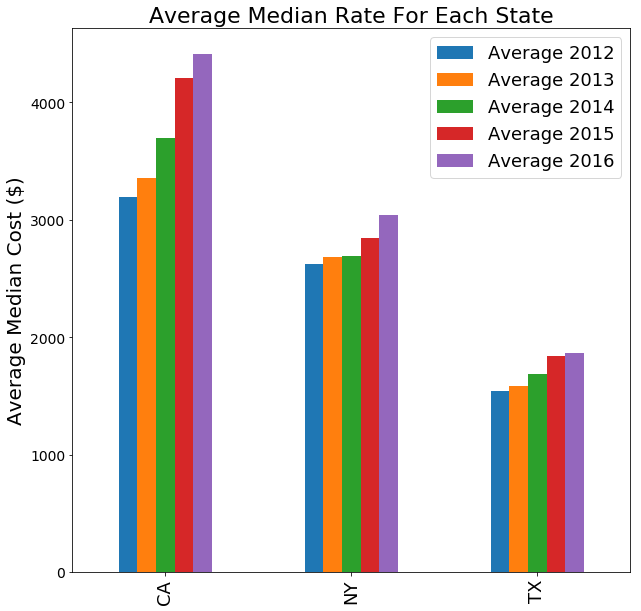

In [44]:
#group by  state ; plot state to state comparison data
Data_Price_Clean_State_Only=Data_Price_Clean.groupby(["State"]).mean()
Data_Price_Clean_State_Only
Data_Price_Clean_State_Only.plot(kind="bar", figsize=(10,10))
plt.xlabel("")
plt.ylabel("Average Median Cost ($)", size=20)
plt.title("Average Median Rate For Each State", size=22)
plt.xticks(size = 18)
plt.yticks(size = 14)
plt.legend(prop={'size': 18})
plt.show()

In [10]:
#group by city type and state ; plot state to state comparison data
Data_Price_Clean_State_Comp=Data_Price_Clean.groupby(["State", "City Type"]).mean()
Data_Price_Clean_State_Comp

Average 2012  Average 2013  Average 2014  Average 2015  \
State City Type                                                           
CA    Rural       3873.421769   4085.969388   4517.442177   5125.624150   
      Suburban    2606.584906   2724.705975   2988.333333   3415.990566   
      Urban       2385.638889   2523.000000   2807.472222   3313.472222   
NY    Rural       2676.028509   2729.281579   2736.956140   2901.783772   
      Suburban    2315.394444   2423.619444   2401.275000   2532.916667   
      Urban       1798.833333   1947.250000   2115.083333   2264.916667   
TX    Rural       1579.355485   1620.345992   1732.419831   1895.575949   
      Suburban    1431.934783   1469.094203   1553.202899   1651.192029   
      Urban       1197.583333   1249.083333   1317.416667   1409.666667   

                 Average 2016  
State City Type                
CA    Rural       5354.295918  
      Suburban    3586.672956  
      Urban       3560.500000  
NY    Rural       3096.345175  
      Suburban    2720.180556  
      Urban       2331.416667  
TX    Rural       1925.996835  
      Suburban    1664.043478  
      Urban       1440.250000

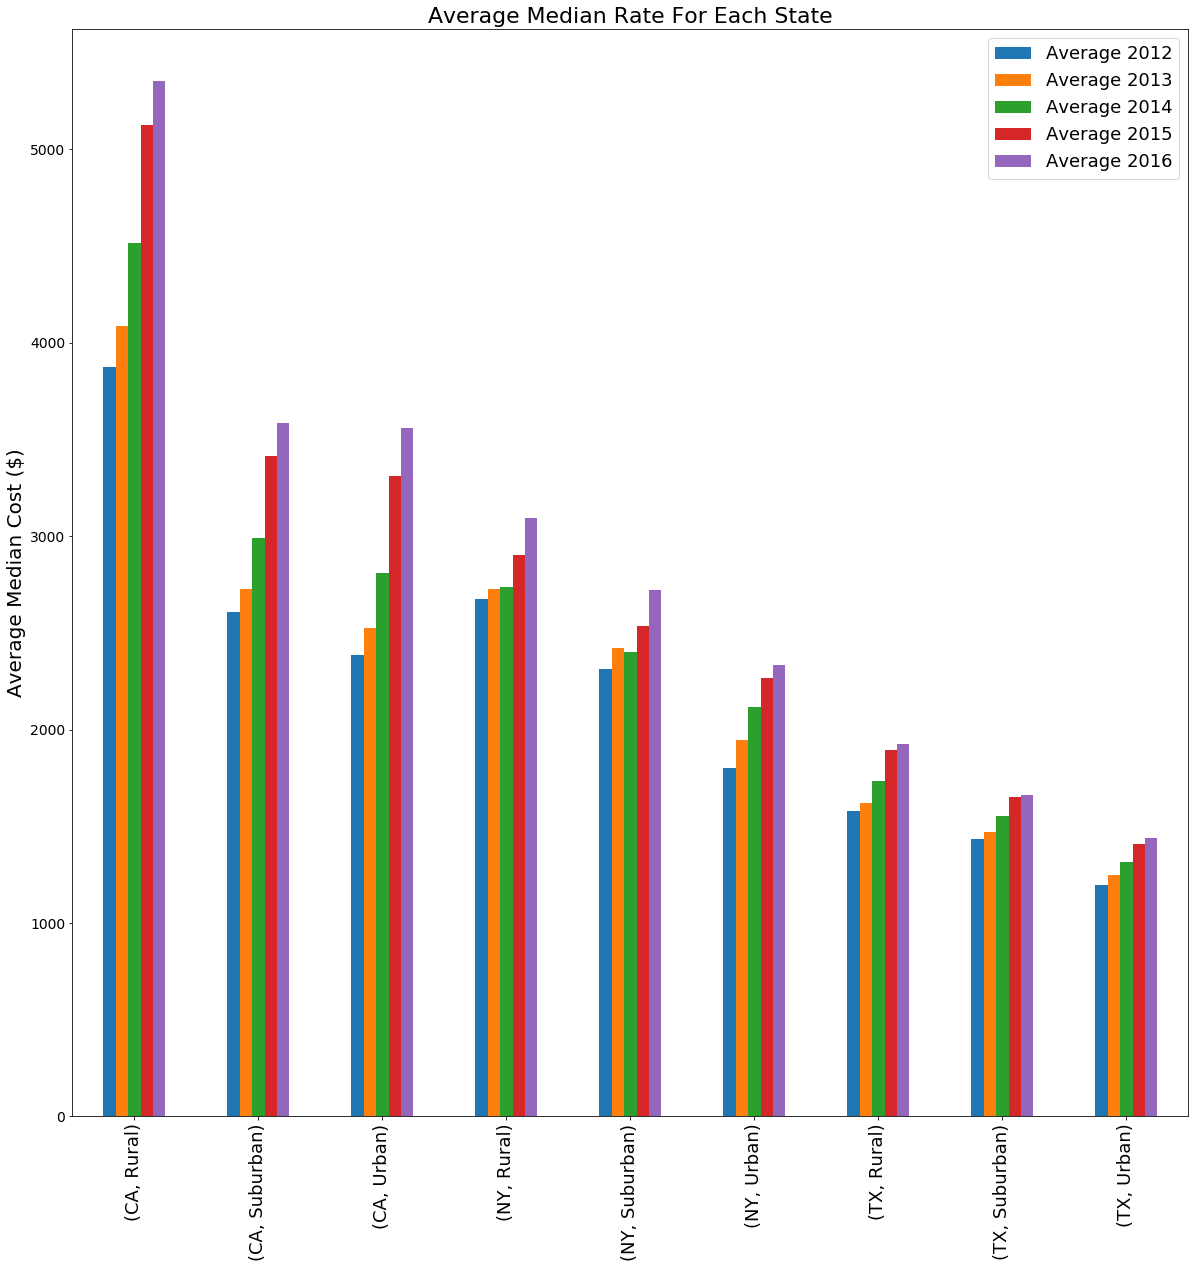

In [48]:
Data_Price_Clean_State_Comp.plot(kind="bar", figsize=(20,20))
plt.xlabel("")
plt.ylabel("Average Median Cost ($)", size=20)
plt.title("Average Median Rate For Each State", size=22)
plt.xticks(size = 18)
plt.yticks(size = 14)
plt.legend(prop={'size': 18})
plt.savefig('Average_Median_Rate_City_Type_All_States.png')
plt.show()

In [12]:
Data_Price_Clean_Overall_Increase=Data_Price_Clean
Data_Price_Clean_Overall_Increase["Overall % Increase"]=round(100*((Data_Price_Clean["Average 2016"]-Data_Price_Clean["Average 2012"])/Data_Price_Clean["Average 2016"]),2)

Data_Price_Clean_Overall_Increase.head()






,City,State,Metro,City Type,Average 2012,Average 2013,Average 2014,Average 2015,Average 2016,Overall % Increase
0,New York,NY,New York,Urban,1798.833333,1947.250000,2115.083333,2264.916667,2331.416667,22.84
3,Houston,TX,Houston,Urban,1197.583333,1249.083333,1317.416667,1409.666667,1440.250000,16.85
10,San Jose,CA,San Jose,Urban,2398.083333,2515.666667,2705.166667,3130.250000,3343.583333,28.28
12,San Francisco,CA,San Francisco,Urban,3037.583333,3276.416667,3708.500000,4319.250000,4503.083333,32.54
42,Oakland,CA,San Francisco,Urban,1721.250000,1776.916667,2008.750000,2490.916667,2834.833333,39.28


In [13]:
#https://pypi.python.org/pypi/uszipcode/0.1.3 package for zipcodes, locate longitude and latitude
#based on longitude and latitude of each city (get from running loop); plot onto a map with https://github.com/vgm64/gmplot

In [14]:
#make a dataframe.head() for each city and city type , rename dataframe (automate?) and then plot out using pandas.plot(bargraph)

In [15]:
#make line graph for city type for each area(SF)
sf_city_type_df=Data_Price_Clean_Overall_Increase
del sf_city_type_df["Overall % Increase"]
sf_city_type_df=sf_city_type_df.loc[Data_Price_Clean_Overall_Increase["State"]=="CA"]
sf_city_type_df=sf_city_type_df.groupby(["City Type"]).mean()


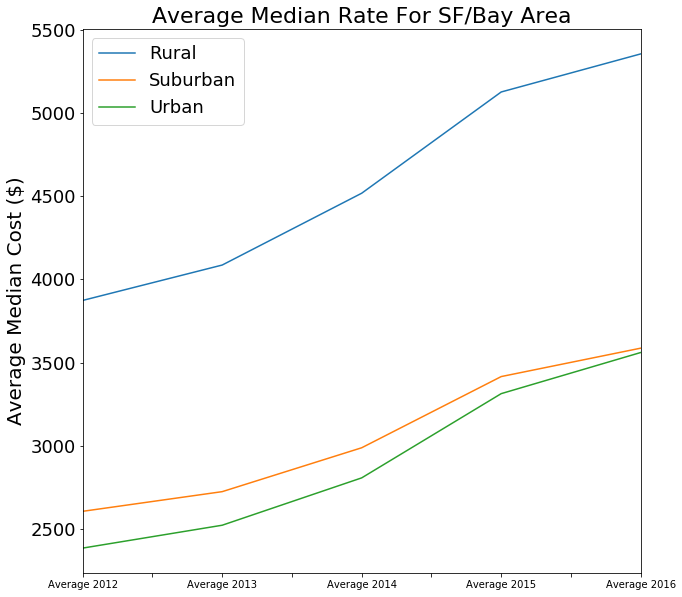

In [68]:
#transform data so that it can be graphed 
sf_city_type_df_t=sf_city_type_df.T
sf_city_type_df_t=sf_city_type_df_t.reset_index()
sf_city_type_df_t.plot("index",["Rural","Suburban","Urban"],kind="line", rot=0, figsize=(10,10))
plt.xlabel("")
plt.ylabel("Average Median Cost ($)", size=20)
plt.title("Average Median Rate For SF/Bay Area", size=22)
plt.xticks(size = 10)
plt.yticks(size = 18)
plt.legend(prop={'size': 18})
plt.savefig('SF_Line_Average_Median_Cost.png')
plt.show()

In [18]:

#make line graph for city type for each area(NY)
NY_city_type_df=Data_Price_Clean_Overall_Increase
#del NY_city_type_df["Overall % Increase"]
NY_city_type_df=NY_city_type_df.loc[Data_Price_Clean_Overall_Increase["State"]=="NY"]
NY_city_type_df=NY_city_type_df.groupby(["City Type"]).mean()

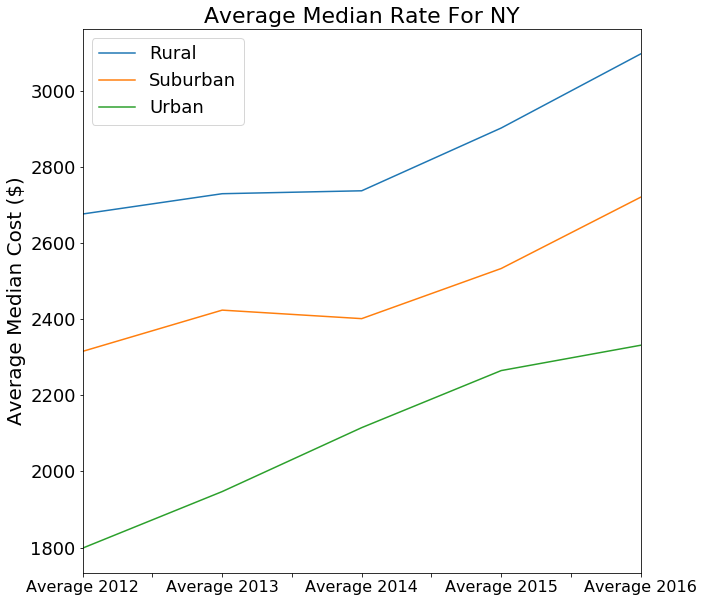

In [71]:
#transform data so that it can be graphed 
NY_city_type_df_t=NY_city_type_df.T
NY_city_type_df_t=NY_city_type_df_t.reset_index()
NY_city_type_df_t.plot("index",["Rural","Suburban","Urban"],kind="line", rot=0,figsize=(10,10))
plt.xlabel("")
plt.ylabel("Average Median Cost ($)", size=20)
plt.title("Average Median Rate For NY", size=22)
plt.xticks(size = 16)
plt.yticks(size = 18)
plt.legend(prop={'size': 18})
plt.savefig('NY_Line_Average_Median_Cost.png')
plt.show()


In [24]:
#make line graph for city type for each area(TX)
TX_city_type_df=Data_Price_Clean_Overall_Increase
#del TX_city_type_df["Overall % Increase"]
TX_city_type_df=TX_city_type_df.loc[Data_Price_Clean_Overall_Increase["State"]=="TX"]
TX_city_type_df=TX_city_type_df.groupby(["City Type"]).mean()

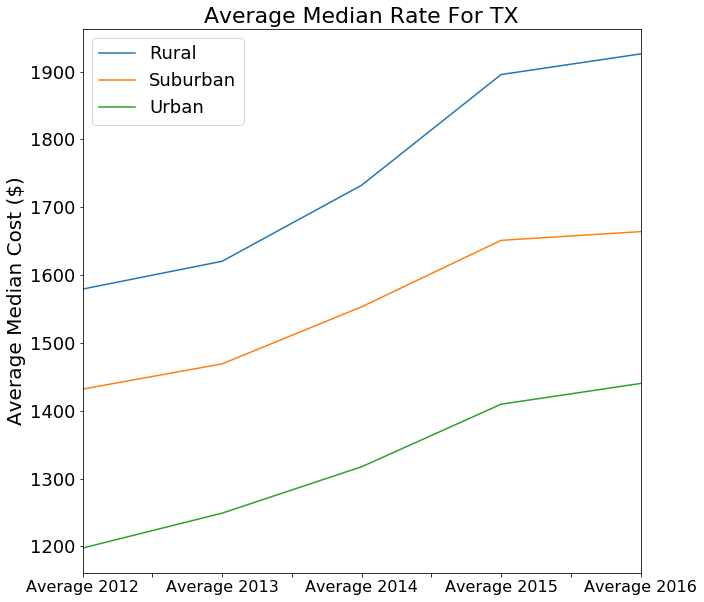

In [72]:
#transform data so that it can be graphed 
TX_city_type_df_t=TX_city_type_df.T
TX_city_type_df_t=TX_city_type_df_t.reset_index()
TX_city_type_df_t.plot("index",["Rural","Suburban","Urban"],kind="line", rot=0, figsize=(10,10))
plt.xlabel("")
plt.ylabel("Average Median Cost ($)", size=20)
plt.title("Average Median Rate For TX", size=22)
plt.xticks(size = 16)
plt.yticks(size = 18)
plt.legend(prop={'size': 18})
plt.savefig('TX_Line_Average_Median_Cost.png')
plt.show()